# Introduction

In this project, I use data visualizations to explore job outcomes of studets who graduated from college between 2010 and 2012. This data set was found on the Github repo of FiveThirtyEight and is a cleaned version of the version released by the American Communtity Survey. I answer questions such as whether students in more popular majors make more money, which majors are predominantly male and which ones are predominantly female, and which category of majors have the most students. I'm interested in knowing the gender distribution in the population of men and women in engineering, what percentage of people take what courses, and how the median earnings differ across majors.  


In [1]:
# Importing necessary libraries. 
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np 
%matplotlib inline

In [113]:
recent_grads = pd.read_csv("recent-grads.csv")
recent_grads[:5]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


## Data Cleaning 

As we can see from a preview of the recent_grads dataset, there are several different types of majors across engineering, physical sciences, law & public policy. Because I am currently interesred in understanding high level patterns, I will use the dataset to create another dataset that containts information aggregated based on the major categories which I will call recent_grads_trimmed. 

In this new dataframe, I'm specifically interested in having data on the total percentage of people in a given major category, the percentage of men and women amongst this people distribution, and median wages per category. Once I have this information, it would be easy to visualize trends and epxlore my inquisitions! 


In [4]:
# Calculating the percentages of people across all majors. 
major_counts = recent_grads["Major_category"].value_counts().to_dict()
major_counts_series = pd.Series(major_counts)
recent_grads_trimmed = pd.DataFrame(data=major_counts_series,columns=["value_counts"])
recent_grads_trimmed["people_percentage"] = (recent_grads_trimmed["value_counts"] / 172) * 100
recent_grads_trimmed = recent_grads_trimmed.sort_values(by=['people_percentage'], ascending=False)

In [5]:
# Then calculating all other information and adding them to the dataframe: 

# Get list of all major categories.
major_cats = list(major_counts.keys())

# Some aggregation to find the percentage of women and men in each major category. 
men_portion = dict() 
women_portion = dict()
employed = dict()
median = dict()
low_wage_jobs = dict()
full_time_jobs = dict()

# Aggregation to find percentage of men and women: 
for major in major_cats: 
    selected = recent_grads[recent_grads["Major_category"] == major]
    men_portion[major] = selected["Men"].sum()
    women_portion[major] = selected["Women"].sum()
    median[major] = selected["Median"].mean()
    low_wage_jobs[major] = selected["Low_wage_jobs"].sum()
    full_time_jobs[major] = selected["Part_time"].sum()

# Turn them into series so they can be added to the dataframe. 
men_portion_series = pd.Series(men_portion)
women_portion_series = pd.Series(women_portion)
median_series = pd.Series(median)
low_wage_job_series = pd.Series(low_wage_jobs)
full_time_jobs_series = pd.Series(full_time_jobs)

In [6]:
# Add the newly calculated series 
recent_grads_trimmed["total_men"] = men_portion_series
recent_grads_trimmed["total_women"] = women_portion_series
recent_grads_trimmed["men_percentage"] = (recent_grads_trimmed["total_men"] / (recent_grads_trimmed["total_men"] + recent_grads_trimmed["total_women"])) * 100
recent_grads_trimmed["women_percentage"] = (recent_grads_trimmed["total_women"] / (recent_grads_trimmed["total_men"] +recent_grads_trimmed["total_women"])) * 100
recent_grads_trimmed["median_wage"] = median_series 
recent_grads_trimmed["total_low_wage_jobs"] = low_wage_job_series
recent_grads_trimmed["total_full_time_jobs"] = full_time_jobs_series
recent_grads_trimmed.drop(["total_men", "total_women", "value_counts"], axis=1)

,people_percentage,men_percentage,women_percentage,median_wage,total_low_wage_jobs,total_full_time_jobs
Engineering,16.860465,75.952365,24.047635,57382.758621,25079,85136
Education,9.302326,18.515584,81.484416,32350.000000,40870,120593
Humanities & Liberal Arts,8.720930,38.242220,61.757780,31913.333333,94240,214030
Biology & Life Science,8.139535,40.743442,59.256558,36421.428571,42742,116736
Business,7.558140,51.279508,48.720492,43538.461538,126788,196936
Health,6.976744,16.302269,83.697731,36825.000000,31270,114592
Computers & Mathematics,6.395349,69.805825,30.194175,42745.454545,16136,53270
Agriculture & Natural Resources,5.813953,53.368157,46.631843,36900.000000,7899,16591
Physical Sciences,5.813953,51.429003,48.570997,41890.000000,14078,43444
Psychology & Social Work,5.232558,20.397832,79.602168,30100.000000,56246,137992


In [7]:
from matplotlib import cm 
cmap1 = cm.get_cmap('Pastel1')
cmap2 = cm.get_cmap('Pastel2')

###  1. Do people in more popular majors make more money? 

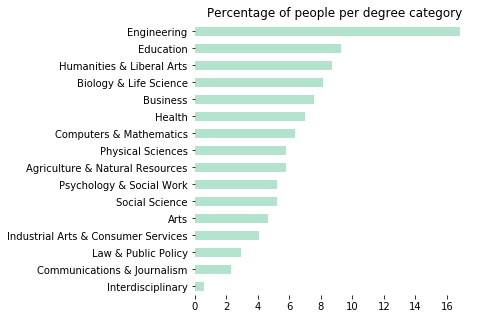

In [140]:
recent_grads_trimmed = recent_grads_trimmed.sort_values(by=['people_percentage'], ascending=True)
median_plot = recent_grads_trimmed['people_percentage'].plot(kind="barh", figsize=(5,5),title="Percentage of people per degree category",colormap=cmap2)
median_plot.spines['top'].set_visible(False)
median_plot.spines['right'].set_visible(False)
median_plot.spines['bottom'].set_visible(False)
median_plot.spines['left'].set_visible(False)

If people in more popular majors made more money, then we'd see engineering, education, humanities, biology, etc make the most money. Is this true though? To answer the question below I visualize the percentage of people across all majors on the x axis and the salaries they make on the y axis. If our investigation were true, then we'd see an upward sloping scatter plot representing a positive relationship between percentage of people in different majors & the wages they make. 

Text(0.5,1,'Exploring correlations between popular majors and wages')

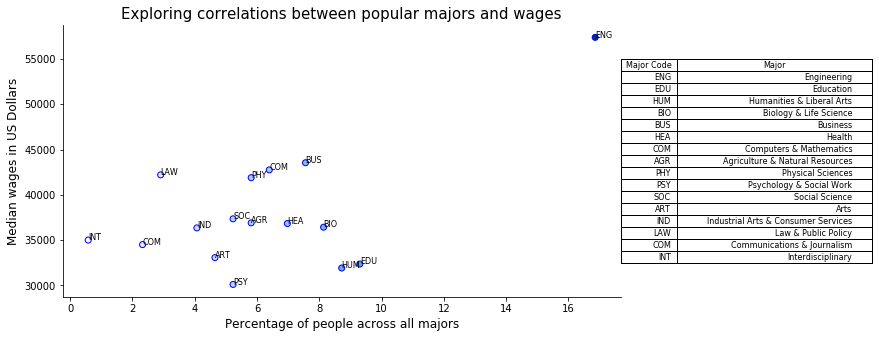

In [109]:
people = recent_grads_trimmed['people_percentage'] 
median_wages = recent_grads_trimmed['median_wage'] 
recent_grads_trimmed = recent_grads_trimmed.sort_values(by=['people_percentage'], ascending=False)
majors_by_people = recent_grads_trimmed.index.tolist()
major_abs = []
for item in majors_by_people:
    major_abs.append(item[:3].upper())

fig, ax = plt.subplots(figsize=(10,5))
plt.scatter(people, median_wages, c=people, cmap=cmap4, edgecolors='blue')

for i, label in enumerate(major_abs):
    ax.annotate(label, (people[i], median_wages[i]), size=8)

# Creating the data for the legend. 
cell_text = [[major_abs[i], majors_by_people[i]] for i in range(len(major_abs))]

cols = ("Major Code", "Major")

t1 = plt.table(cellText=cell_text ,  
               colLabels=cols,
               colWidths=[0.1, 0.35],
               loc='right')

ax.add_table(t1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Percentage of people across all majors", size=12)
ax.set_ylabel("Median wages in US Dollars", size=12)
ax.set_title("Exploring correlations between popular majors and wages",size=15)

Here we measure popularity by the percentage of students enrolled in the major category. This scatter plot shows that the most popular majors are not the highest paying ones. In fact, we can see that the major categories that are most popular such as education, humanities, and biology are on the lower ends of the wage spectrum. Whereas not popular majors such as law and physics pay more. 

###  2. What is the gender distributions across all major categories? 

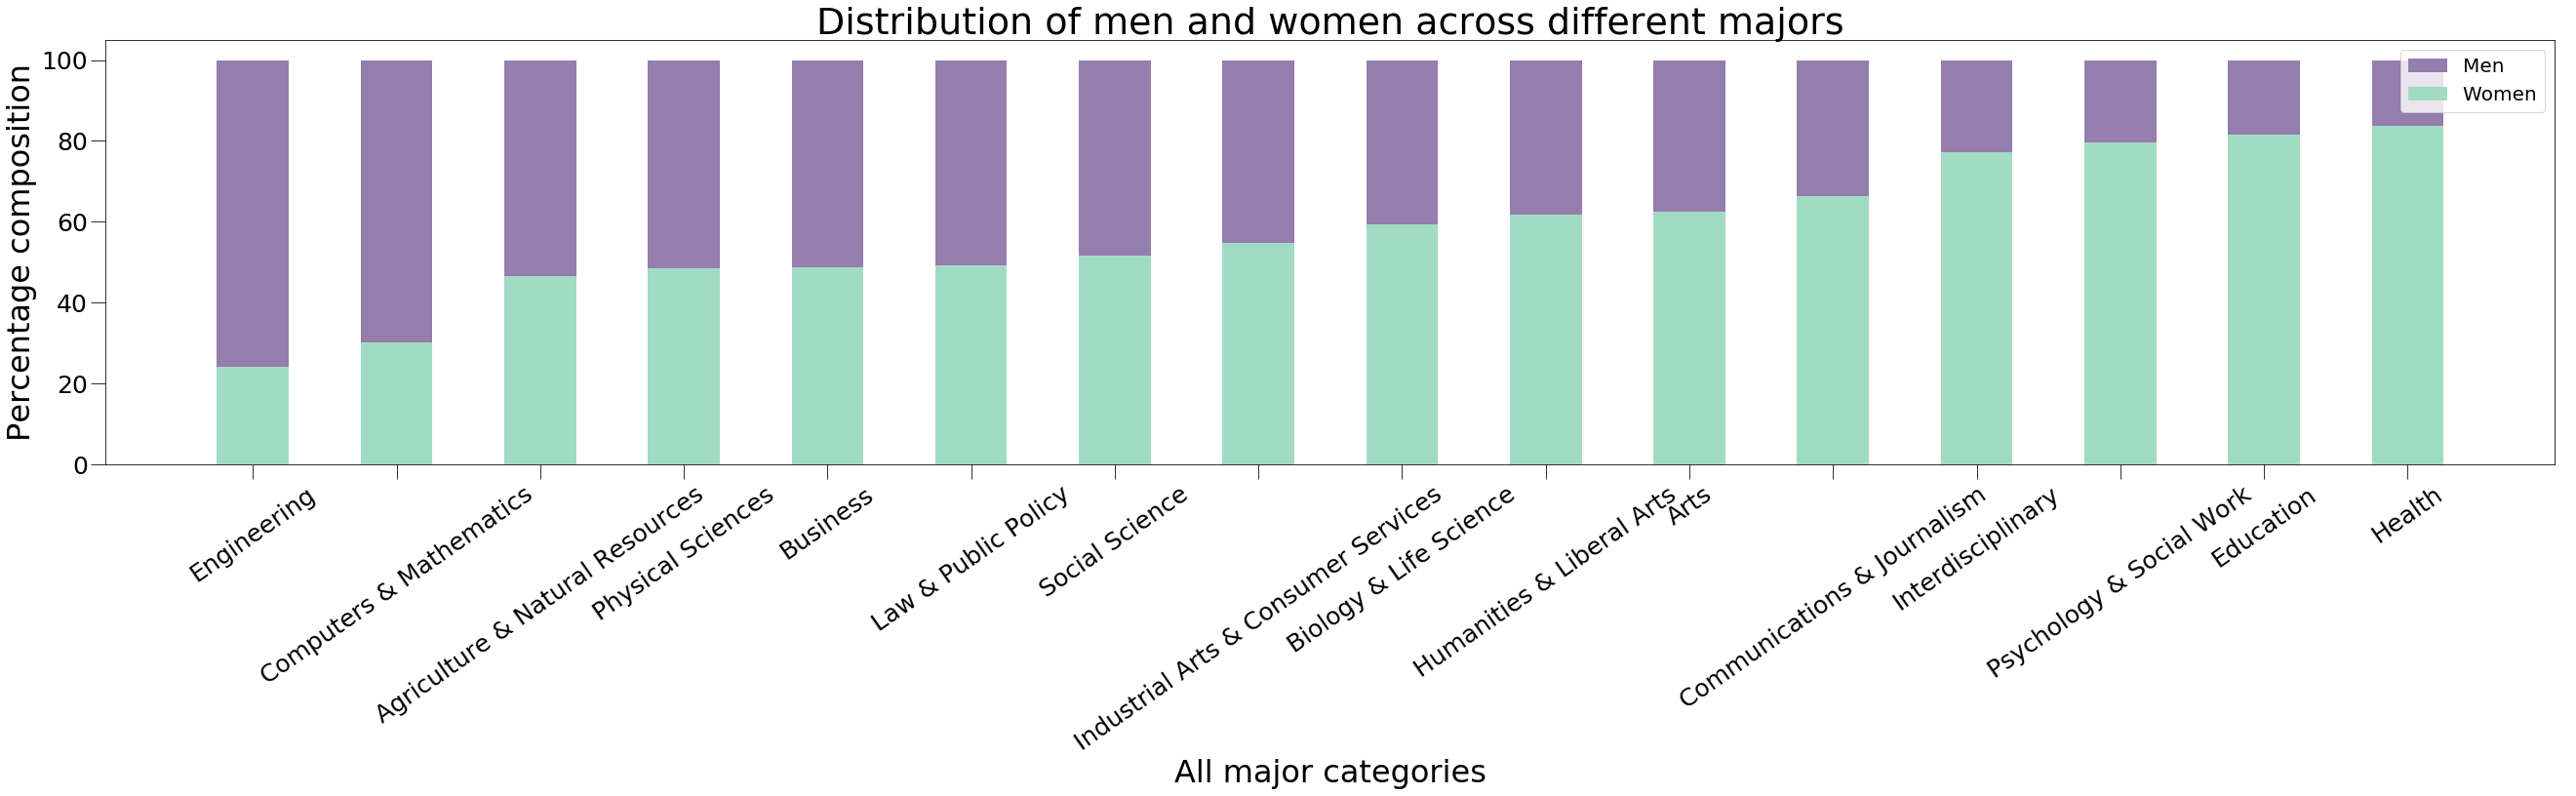

In [139]:
recent_grads_trimmed = recent_grads_trimmed.sort_values(by=['women_percentage'], ascending=True)
majors = recent_grads_trimmed.index.tolist()
women = recent_grads_trimmed['women_percentage']
men = recent_grads_trimmed['men_percentage']
x_values = np.arange(len(women))
width = 0.5
plt.figure(figsize=(45,8))
pl1 = plt.bar(x_values, women, width, color='#A2DBC3') 
pl2 = plt.bar(x_values, men, width, bottom=women, color='#957DAD') 
plt.legend(( pl2[0], pl1[0]), ('Men', 'Women'), prop={'size': 20})
plt.xticks(x_values, majors,rotation=35)
plt.tick_params(length=15, labelsize=25)
plt.xlabel("All major categories",fontsize=32)
plt.ylabel("Percentage composition",fontsize=32)
plt.title("Distribution of men and women across different majors", fontsize=38)
plt.show()

An observation we can make is the fields with lower representation of women are the highest paying fields whereas fields with higher representation of women are the lowest paying fields. 

###  3. Which majors have the highest and lowest number of low paying jobs? 

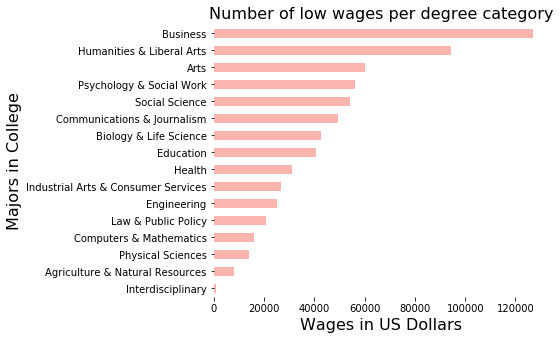

In [121]:
recent_grads_trimmed = recent_grads_trimmed.sort_values(by=['total_low_wage_jobs'], ascending=True)
median_plot = recent_grads_trimmed['total_low_wage_jobs'].plot(kind="barh", figsize=(6,5),colormap=cmap1)
median_plot.set_title("Number of low wages per degree category",fontsize=16 )
median_plot.set_xlabel("Wages in US Dollars", fontsize=16)
median_plot.set_ylabel("Majors in College", fontsize=16)
median_plot.spines['top'].set_visible(False)
median_plot.spines['right'].set_visible(False)
median_plot.spines['bottom'].set_visible(False)
median_plot.spines['left'].set_visible(False)


We also see that the fields that are predominatly female dominated have higher number of low wages per degree category except for business. This suggests that not only are women going into fields that pay less but that the number of low wages jobs in these fields are higher than in high paying fields. 